In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.20.3)


In [1]:
import sklearn

print(sklearn.__version__)

0.20.3


In [ ]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import StandardScaler, scale

In [3]:
df = pd.read_csv('datasets/Absenteeism_at_work.csv', delimiter=';')

In [ ]:
df.head(10)

In [189]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [190]:
df = df[['Transportation expense', 
         'Distance from Residence to Work',
         'Service time',
         'Age',
         'Work load Average/day ', 
         'Weight', 
         'Height', 
         'Body mass index',
         'Absenteeism time in hours']]

In [191]:
df.rename(columns={
    'Transportation expense': 'Transportation',
    'Distance from Residence to Work': 'Distance',
    'Service time': 'Service',
    'Work load Average/day ': 'Workload',
    'Body mass index': 'BMI',
    'Absenteeism time in hours': 'AbsentHours'
}, inplace=True)

In [192]:
df.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289,36,13,33,239.554,90,172,30,4
1,118,13,18,50,239.554,98,178,31,0
2,179,51,18,38,239.554,89,170,31,2
3,279,5,14,39,239.554,68,168,24,4
4,289,36,13,33,239.554,90,172,30,2


In [193]:
df = df.astype(np.float64)

In [194]:
print('Transportation expense, average: ', np.mean(df['Transportation'].values))

print('Transportation expense, median: ', np.median(df['Transportation'].values))

print('Transportation expense, variance: ', np.var(df['Transportation'].values))

print('Transportation expense, standard deviation: ', np.std(df['Transportation'].values))

Transportation expense, average:  221.32972972972973
Transportation expense, median:  225.0
Transportation expense, variance:  4476.542629656684
Transportation expense, standard deviation:  66.90696996320102


In [195]:
print('Workload, average: ', df['Workload'].mean())

print('Workload, median: ', df['Workload'].median())

print('Workload, variance: ', df['Workload'].var())

print('Workload, standard deviation: ', df['Workload'].std())

Workload, average:  271.49023513513544
Workload, median:  264.249
Workload, variance:  1525.5364401665527
Workload, standard deviation:  39.058116188143956


In [196]:
df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


In [197]:
df.sample(5)

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
8,155.0,12.0,14.0,34.0,239.554,95.0,196.0,25.0,40.0
536,118.0,10.0,10.0,37.0,268.519,83.0,172.0,28.0,8.0
278,179.0,51.0,18.0,38.0,294.217,89.0,170.0,31.0,8.0
295,179.0,26.0,9.0,30.0,265.017,56.0,171.0,19.0,8.0
535,179.0,51.0,18.0,38.0,268.519,89.0,170.0,31.0,1.0


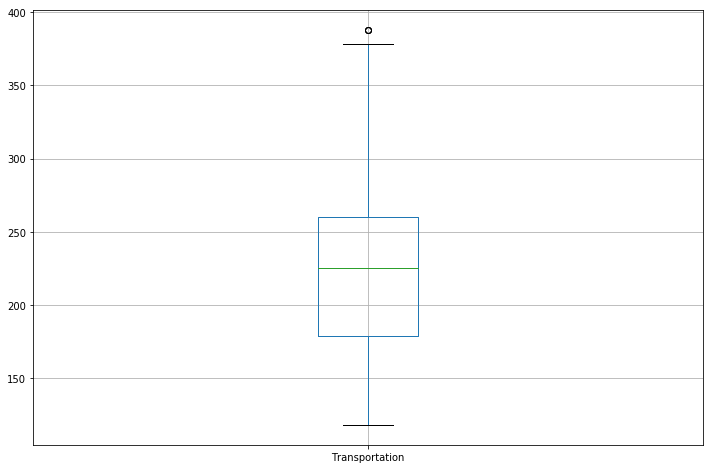

In [198]:
df.boxplot(column=['Transportation'], figsize=(12, 8))

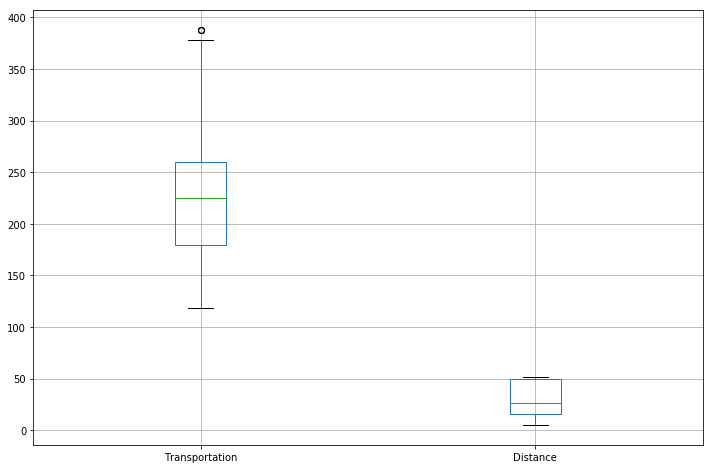

In [199]:
df.boxplot(column=['Transportation', 'Distance'], figsize=(12, 8))

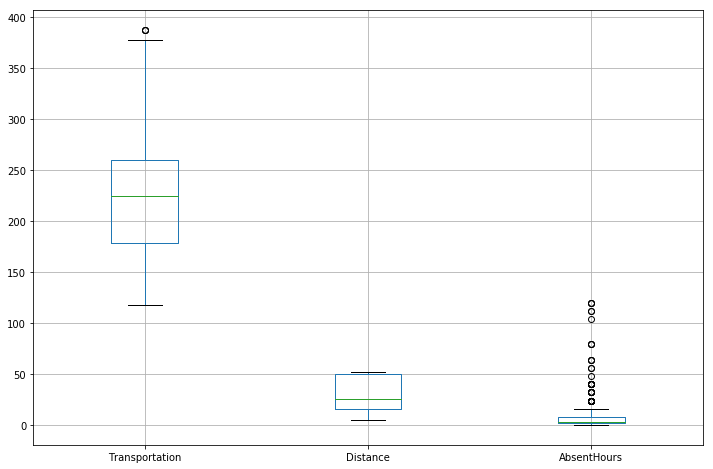

In [200]:
df.boxplot(column=['Transportation', 'Distance', 'AbsentHours'], figsize=(12, 8))

In [201]:
scaled_df = pd.DataFrame()

In [202]:
scaled_df['Transportation'] = (df['Transportation'] - np.mean(df['Transportation'].values)) / \
            np.std(df['Transportation'].values)

scaled_df['Distance'] = (df['Distance'] - np.mean(df['Distance'].values)) / \
            np.std(df['Distance'].values)

scaled_df['AbsentHours'] = (df['AbsentHours'] - np.mean(df['AbsentHours'].values)) / \
            np.std(df['AbsentHours'].values)

In [203]:
scaled_df.head()

,Transportation,Distance,AbsentHours
0,1.011408,0.429556,-0.219511
1,-1.544379,-1.121694,-0.519767
2,-0.632665,1.441240,-0.369639
3,0.861947,-1.661258,-0.219511
4,1.011408,0.429556,-0.369639


In [204]:
scaled_df.describe()

,Transportation,Distance,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,8.487898e+00


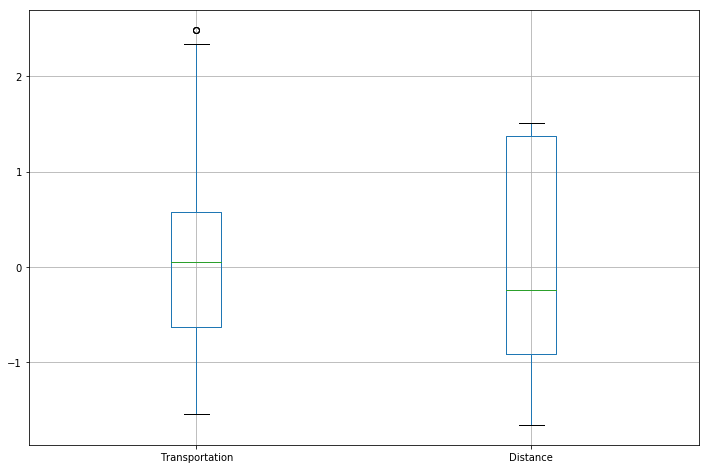

In [205]:
scaled_df.boxplot(column=['Transportation', 'Distance'], figsize=(12, 8))

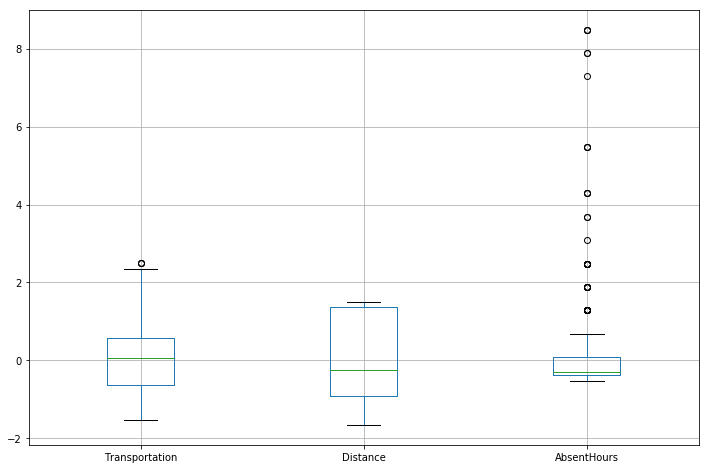

In [206]:
scaled_df.boxplot(figsize=(12, 8))

In [207]:
df.to_csv('Datasets/absenteeism_processed.csv', index=False)

In [4]:
!ls Datasets

Absenteeism_at_work.csv    data_1024.csv
Analyst_Forecasts.csv      diet_data.csv
Analyst_Forecasts_Orig.csv mark.csv
Mall_Customers.csv         mark_year.csv
StudentsPerformance.csv    store_visits.csv
absenteeism_processed.csv  student_performance.csv
